In [1]:
import numpy as np
import pandas as pd

In [4]:
df =pd.read_csv(r"C:\Users\U6056186\Downloads\heart (1).csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
X= df.drop(columns=['target'])
y =df['target']

In [7]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [12]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
estimat = [
    ('rf',RandomForestClassifier(n_estimators=10,random_state=42)),
     ('knn',KNeighborsClassifier(n_neighbors=10)),
     ('gbdt',GradientBoostingClassifier())
]

In [15]:
clf = StackingClassifier(estimators=estimat,final_estimator=LogisticRegression(),
                        cv=10)

In [16]:
clf.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [21]:
ypred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,ypred)

0.8688524590163934

#  Hierarchical Clustering

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
custd= pd.read_csv(r"C:\Users\U6056186\Downloads\hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv")

In [5]:
custd.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data = custd.iloc[:,3:5].values

In [7]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
clust =AgglomerativeClustering(n_clusters=5,linkage='ward')

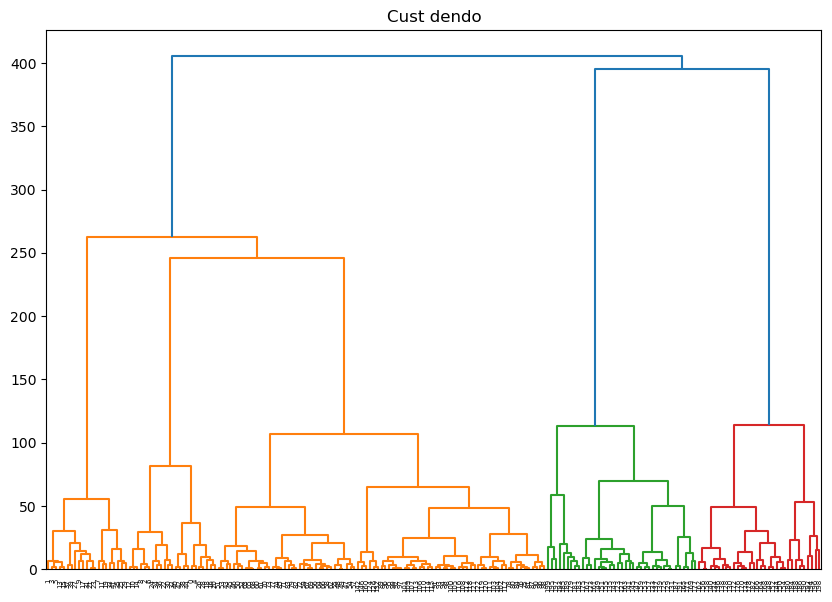

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Cust dendo')
dend =shc.dendrogram(shc.linkage(data,method='ward'))

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
clust =AgglomerativeClustering(n_clusters=5,linkage='ward')

In [20]:
labels =clust.fit_predict(data)

In [21]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

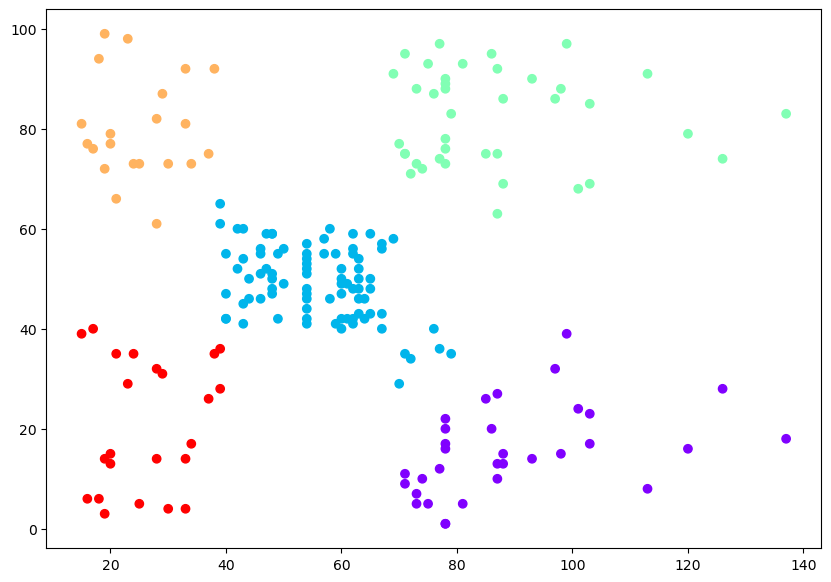

In [22]:
clust =AgglomerativeClustering(n_clusters=5,linkage='ward')
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow')

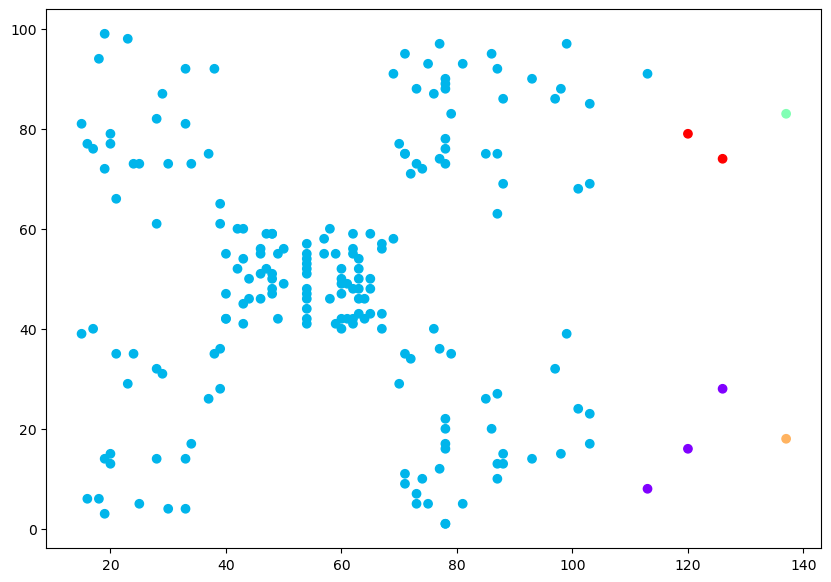

In [25]:
clust =AgglomerativeClustering(n_clusters=5,linkage='single')
labels =clust.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow')

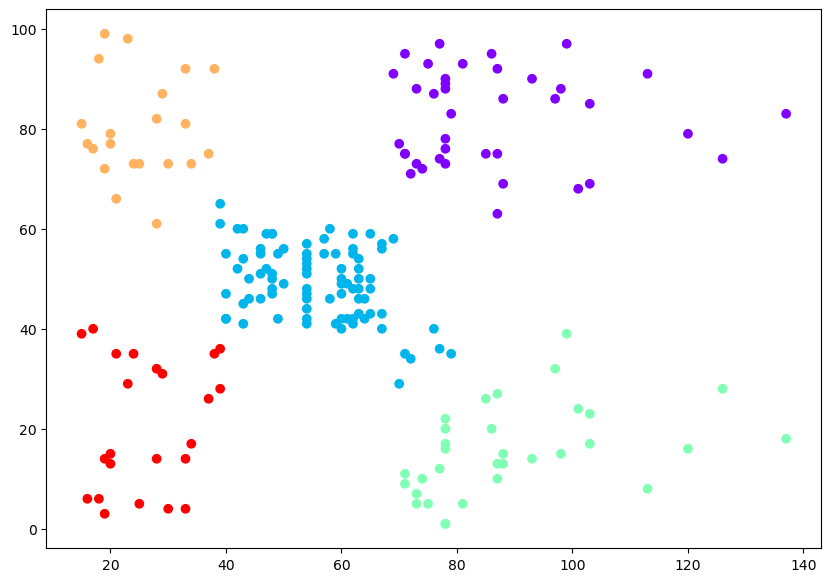

In [26]:
clust =AgglomerativeClustering(n_clusters=5,linkage='complete')
labels =clust.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow')

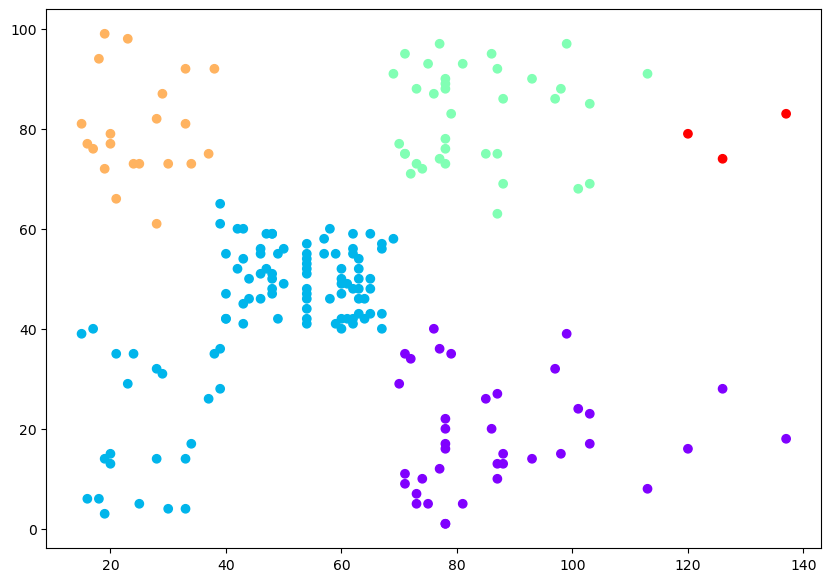

In [27]:
clust =AgglomerativeClustering(n_clusters=5,linkage='average')
labels =clust.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow')

In [ ]:
{'ward', 'complete', 'average', 'single'}